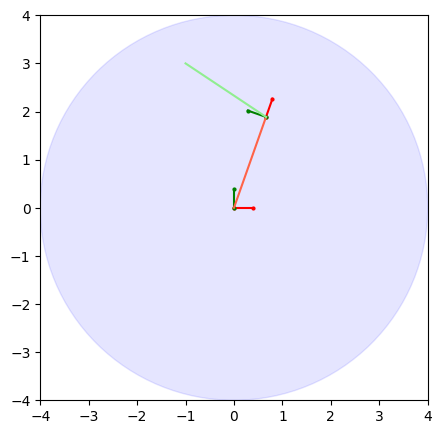

theta1: 70.67370491588697
theta2: 75.52248781407008


In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pat

def inverse_kinematics_2link(l1, l2, xe, ye):
    """
    2次元平面上の2リンクロボットアームの逆運動学を求める
    
    Parameters
    ----------
    l1 : float
        リンク1の長さ
    l2 : float
        リンク2の長さ
    xe : float
        手先のx座標
    ye : float
        手先のy座標

    Returns
    -------
    theta1 : float
        リンク1の関節角度(rad)
    theta2 : float
        リンク2の関節角度(rad)
    """
    try:
        # 代数的に求めた逆運動学の式
        theta1 = -math.acos((xe**2 + ye**2 + l1**2 - l2**2)/(2 * l1 * math.sqrt(xe**2 + ye**2))) + math.atan2(ye, xe)
        theta2 = math.acos((xe**2 + ye**2 - l1**2 - l2**2)/(2 * l1 * l2))

        # 幾何学的に求めた逆運動学の式（「幾何学的」な手法を試したい場合は、下記のコメントを外してください）
        # theta1 = math.atan2(ye,xe) - math.acos((-l2**2 + l1**2 + xe**2 + ye**2)/(2 * l1 * math.sqrt(xe**2 + ye**2)))
        # theta2 = math.pi - math.acos((-xe**2 - ye**2 + l2**2 + l1**2)/(2 * l2* l1))
    except: # 解が存在しない(xe, ye)を入力した場合、Noneを出力
        theta1 = None
        theta2 = None
    return theta1, theta2

##### ここを変更すると結果が変わります #######
# 各リンクの長さ
l1 = 2
l2 = 2

# 手先の座標
xe = -1.0
ye = 3.0
############################################

theta1, theta2 = inverse_kinematics_2link(l1, l2, xe, ye)

############# 以下描画用 ###################################

# 描画には各リンクの先端の座標が必要なので、求めたtheta1, theta2を使って順運動学を解く（描画しないなら不要）
# 同次変換行列（順運動学）← 「同次変換行列による順運動学」の記事はこちら https://qiita.com/akinami/items/9e65389929cedb1c9551
def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める
    
    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同次変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])


def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

# 角度が求められたら描画
if (theta1 is not None) and (theta2 is not None):
    x1, y1 = 0, 0
    H12 = make_homogeneous_transformation_matrix(l1, theta1)
    H2e = make_homogeneous_transformation_matrix(l2, theta2)
    H12e = H12@H2e

    o2 = H12@np.array([[x1],
                    [y1],
                    [1]])
    x2, y2 = o2[0][0], o2[1][0]

    oe = H12e@np.array([[x1],
                        [y1],
                        [1]])

    #アームの駆動範囲の円（真円）
    circle1 = pat.Circle(xy = (x1, y1), radius= l1+l2, color="blue", alpha=0.1)
    ax.add_patch(circle1)

    plt.xlim(-(l1+l2),(l1+l2))
    plt.ylim(-(l1+l2),(l1+l2))

    axes_length = (l1+l2)*0.1
    draw_link_coordinate(ax, np.array([[1, 0, 0],
                                    [0, 1, 0],
                                    [0, 0, 1]]), axes_length) # 座標系1の描画
    draw_link_coordinate(ax, H12, axes_length) # 座標系2の描画
    ax.plot([x1, x2], [y1, y2], color="tomato") # link1の描画
    ax.plot([x2, xe], [y2, ye], color="lightgreen") # link2の描画
    plt.show()
    print("theta1:",math.degrees(theta1))
    print("theta2:",math.degrees(theta2))
else:
    print("手先の座標が範囲外です。")




In [7]:
print((xe**2 + ye**2 + l1**2 - l2**2)/(2 * l1 * math.sqrt(xe + ye)))

2.075


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import math
import matplotlib.patches as pat
%matplotlib inline

def inverse_kinematics_2link(l1, l2, xe, ye):
    """
    2次元平面上の2リンクロボットアームの逆運動学を求める
    
    Parameters
    ----------
    l1 : float
        リンク1の長さ
    l2 : float
        リンク2の長さ
    xe : float
        手先のx座標
    ye : float
        手先のy座標

    Returns
    -------
    theta1 : float
        リンク1の関節角度(rad)
    theta2 : float
        リンク2の関節角度(rad)
    """
    try:
        # 代数的に求めた逆運動学の式
        theta1 = -math.acos((xe**2 + ye**2 + l1**2 - l2**2)/(2 * l1 * math.sqrt(xe**2 + ye**2))) + math.atan2(ye, xe)
        theta2 = math.acos((xe**2 + ye**2 - l1**2 - l2**2)/(2 * l1 * l2))

        # 幾何学的に求めた逆運動学の式（「幾何学的」な手法を試したい場合は、下記のコメントを外してください）
        # theta1 = math.atan2(ye,xe) - math.acos((-l2**2 + l1**2 + xe**2 + ye**2)/(2 * l1 * math.sqrt(xe**2 + ye**2)))
        # theta2 = math.pi - math.acos((-xe**2 - ye**2 + l2**2 + l1**2)/(2 * l2* l1))
    except: # 解が存在しない(xe, ye)を入力した場合、Noneを出力
        theta1 = None
        theta2 = None
    return theta1, theta2

# 描画には各リンクの先端の座標が必要なので、逆運動学によって求めたtheta1, theta2を使って順運動学を解く（描画しないなら不要）
# 同次変換行列（順運動学）← 「同次変換行列による順運動学」の記事はこちら https://qiita.com/akinami/items/9e65389929cedb1c9551
def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める
    
    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同次変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])

def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

def generate_vbox_text_widget(l1, l2):
    """
    text widgetsを2個作成 -> Vboxに格納して縦に並べる（範囲は-l1-l2〜l1+l2）
    
    Parameters
    ----------
    l1 : float
        リンク1の長さ
    l2 : float
        リンク2の長さ

    Returns
    -------
    vox_text_widgets : ipywidgets.widgets.widget_box.VBox
        text widgetsをnum個，縦に並べたVBox
    """
    text_widgets = []
    for i in range(2):
      text_widgets.append(ipywidgets.FloatText(min=-l1-l2, max=l1+l2))
    vox_text_widgets = ipywidgets.VBox(text_widgets)
    return vox_text_widgets

def generate_vbox_slider_widget(l1, l2):
    """
    slider widgetsを2個作成 -> Vboxに格納して縦に並べる．（範囲は-l1-l2〜l1+l2）
    
    Parameters
    ----------
    l1 : float
        リンク1の長さ
    l2 : float
        リンク2の長さ

    Returns
    -------
    vox_slider_widgets : ipywidgets.widgets.widget_box.VBox
        slider widgetsをnum個，縦に並べたVBox
    """
    slider_widgets = []
    
    slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=-l1-l2, max=l1+l2, description = "xe:", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=-l1-l2, max=l1+l2, description = "ye:", disabled=False))
    vox_slider_widgets = ipywidgets.VBox(slider_widgets)
    return vox_slider_widgets


def link_slider_and_text(box1, box2):
    """
    Box内の複数のwidetを連携させる（二つのbox内のwidgetの数が同じである必要あり）
    
    Parameters
    ----------
    box1 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    box2 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    link_num : int
        linkの数
    """
    for i in range(2):
      ipywidgets.link((box1.children[i], 'value'), (box2.children[i], 'value'))

def draw_interactive(l1, l2):
    """
    結果をアニメーションで表示
    Parameters
    ----------
    link_num : int
        linkの数
    """
    # slider widgetを作成
    posture_sliders = generate_vbox_slider_widget(l1, l2)
    # text widgetを作成
    posture_texts = generate_vbox_text_widget(l1, l2)

    # slider widget と　posture widget を横に並べる
    slider_and_text = ipywidgets.Box([posture_sliders, posture_texts])

    # slider wiget と text widget を連携
    link_slider_and_text(posture_sliders, posture_texts)

    # リセットボタン
    reset_button = ipywidgets.Button(description = "Reset")
    # 姿勢のリセットボタン
    def reset_values(button):
        for i in range(2):
            posture_sliders.children[i].value = 0.0
    reset_button.on_click(reset_values)

    # main文にslider widgetsの値を渡す
    params = {}
    for i in range(2):
        params[str(i)] = posture_sliders.children[i]
    final_widgets = ipywidgets.interactive_output(main, params)
    
    display(slider_and_text, reset_button, final_widgets)

# 各リンクの長さ
l1 = 2.0
l2 = 2.0
def main(*args, **kwargs):

    params = kwargs
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)    
    ################ ここから逆運動学にの処理（メイン部分） #############################

    # 手先位置（可変）
    xe = params["0"]
    ye = params["1"]

    theta1, theta2 = inverse_kinematics_2link(l1, l2, xe, ye)

    ####################### 以下描画 ################################################
    if (theta1 is not None) and (theta2 is not None):
        x1, y1 = 0, 0
        H12 = make_homogeneous_transformation_matrix(l1, theta1)
        H2e = make_homogeneous_transformation_matrix(l2, theta2)
        H12e = H12@H2e

        o2 = H12@np.array([[x1],
                        [y1],
                        [1]])
        x2, y2 = o2[0][0], o2[1][0]

        oe = H12e@np.array([[x1],
                            [y1],
                            [1]])
        xe, ye = oe[0][0], oe[1][0]

        #アームの駆動範囲の円（真円）
        circle1 = pat.Circle(xy = (x1, y1), radius= l1+l2, color="blue", alpha=0.1)
        ax.add_patch(circle1)

        plt.xlim(-(l1+l2),(l1+l2))
        plt.ylim(-(l1+l2),(l1+l2))

        axes_length = (l1+l2)*0.1
        draw_link_coordinate(ax, np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]]), axes_length) # 座標系1の描画
        draw_link_coordinate(ax, H12, axes_length) # 座標系2の描画
        ax.plot([x1, x2], [y1, y2], color="tomato") # link1の描画
        ax.plot([x2, xe], [y2, ye], color="lightgreen") # link2の描画
        plt.grid()
        plt.show()
        print("theta1:",math.degrees(theta1))
        print("theta2:",math.degrees(theta2))
    else:
        print("手先の座標が範囲外です。")

draw_interactive(l1, l2)

Box(children=(VBox(children=(FloatSlider(value=0.0, description='xe:', max=4.0, min=-4.0), FloatSlider(value=0…

Button(description='Reset', style=ButtonStyle())

Output()